In [1]:
!lsb_release -a #Linux info
!cat /proc/cpuinfo # CPU info
!df -h #disc info
!cat /proc/meminfo #RAM info
#!sudo apt install speedtest-cli #library for speedtesting
#!speedtest-cli # network speed test
!nvidia-smi #GPU info

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.4 LTS
Release:	20.04
Codename:	focal
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) Silver 4215R CPU @ 3.20GHz
stepping	: 7
microcode	: 0x5003003
cpu MHz		: 3199.837
cache size	: 11264 KB
physical id	: 0
siblings	: 8
core id		: 0
cpu cores	: 8
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush acpi mmx fxsr sse sse2 ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch cpuid_fault invpcid_single pti intel_ppin ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt flush_l1d
bugs		: cpu_meltdown spectre_v1 spectre_v

In [2]:
#!sudo apt install unrar
#!unrar e /notebooks/drawings.rar /notebooks/DATA/drawings
#!unrar e /notebooks/engraving.rar /notebooks/DATA/engravings
#!unrar e /notebooks/painting.rar /notebooks/DATA/painting
#!unrar e /notebooks/iconography.rar /notebooks/DATA/iconography
#!unrar e /notebooks/sculpture.rar /notebooks/DATA/sculpture

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.6.6-2build1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /notebooks/drawings.rar

No files to extract

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /notebooks/engraving.rar

No files to extract

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /notebooks/painting.rar

No files to extract

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal

Unexpected end of archive

Extracting from /notebooks/iconography.rar

Unexpected end of archive
No files to extract


In [3]:
!ls -l

total 1789259
drwxr-xr-x  5 root root          3 Oct 12 20:35 DATA
-rw-r--r--  1 root root     219522 Oct 18 13:11 DCGAN_EX_ART_Paintings-ver2.ipynb
-rw-r--r--  1 root root     217311 Oct 18 12:56 DCGAN_EX_ART_Paintings.ipynb
drwxr-xr-x  3 root root          7 Oct 12 15:39 ML_logs
-rw-r--r--  1 root root        147 Oct  5 11:36 README.md
-rw-r--r--  1 root root  509059824 Oct 11 20:25 Van_Gogh_paintins.zip
-rw-r--r--  1 root root 1099878221 Oct 12 19:08 abstrakt_paintings.zip
-rw-r--r--  1 root root    1854669 Oct  8 11:53 drawings.rar
-rw-r--r--  1 root root   32814366 Oct  8 11:56 engraving.rar
-rw-r--r--  1 root root  122605667 Oct  8 11:58 iconography.rar
-rw-r--r--  1 root root   30971378 Oct  8 11:56 painting.rar
-rw-r--r--  1 root root      29848 Oct  5 11:36 quick_start_pytorch.ipynb
drwxr-xr-x  2 root root          1 Oct  5 11:36 quick_start_pytorch_images
-rw-r--r--  1 root root   34547272 Oct  8 11:56 sculpture.rar
drwxr-xr-x 37 root root         39 Oct 18 12:57 wandb


In [2]:
from PIL import Image
import os,time
import cv2
import numpy as np
#img_dir='/notebooks/DATA'
def verify_folder(folder_dir):
    
    def verify_image(img_file):
         #test image
         try:
            v_image = Image.open(img_file)
            v_image.verify()
            return True;
            #is valid
            #print("valid file: "+img_file)
         except OSError:
            return False;

    for root, dirs, files in os.walk(folder_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
                currentFile=os.path.join(root, file)
                #print(currentFile)
                #test image
                if verify_image(currentFile):
                    im = cv2.imread(currentFile)
                    if im.shape[0] < 64 or im.shape[1] < 64:
                        print('undersized file')
                        os.remove(currentFile)
                else:
                    os.remove(currentFile)
                    print("corrupt file")
                    
            else:
                os.remove(os.path.join(root, file))
                print("unsupported file extension")
    print('DONE')
                    
verify_folder('/notebooks/DATA')


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile


KeyboardInterrupt: 

In [24]:
# import the required packages

import torch
import argparse
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image
from torchvision.utils import make_grid
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision.utils as vutils
from matplotlib.pyplot import figure

# DataLoader 
import os
from os import listdir
from os.path import isfile, join
from PIL import Image
import cv2

#import torch
#from torch.utils.tensorboard import SummaryWriter
#writer = SummaryWriter()
#for i in range(440):
#    writer.add_scalar("i/i^2", i, i**2)
#writer.flush()

In [5]:
# HyperParameters
batch_size = 1024
learning_rate = 0.005
betas=(0.5, 0.999) #beta1, beta2 for Adam Optimizer
momentum = 0.9 # for SGD optimizer

In [6]:
class ArtDataset(Dataset):
    """Art dataset"""

    def __init__(self, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = []
        self.dirName_1 = '/notebooks/DATA'
        self.files_list = []
        self.transform = transform
        self.load_images()
        

    def load_images(self):
        
        for root, dirs, files in os.walk(self.dirName_1):
            for file in files:
                #print(root, file)
                self.files_list.append(os.path.join(root, file))
                    
        self.labels = np.full(shape=len(self.files_list), fill_value=0, dtype=int)
            

    def __len__(self):
        return len(self.files_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
    
        image = Image.open(self.files_list[idx]).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
            

        return (image, label)

In [7]:
# can be omitted if mean and std is already calculated
# for calcualting mean and std od dataset
def get_mean_and_std(dataset):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in tqdm(dataset):
        #print(data.shape)
        # Mean over height and width, but not over the channels
        channels_sum += torch.mean(data, dim=[1,2])
        channels_squared_sum += torch.mean(data**2, dim=[1,2])
        num_batches += 1

    mean = channels_sum / num_batches

    # std = sqrt(E[X^2] - (E[X])^2)
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

100%|██████████| 16408/16408 [02:08<00:00, 127.64it/s]


mean: [0.5927285552024841, 0.538730263710022, 0.4859641492366791], std: [0.30223119258880615, 0.2943011224269867, 0.2963792085647583]


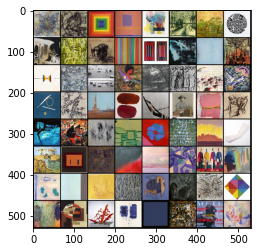

In [8]:
# Calculate mean and std
train_transform_WN = transforms.Compose([transforms.ToTensor(),
                                         transforms.Resize((64, 64))])
Calc_dataset = ArtDataset(transform=train_transform_WN)

mean, std = get_mean_and_std(Calc_dataset)

train_Calc_dataset = torch.utils.data.DataLoader(dataset=Calc_dataset, batch_size=64, shuffle=True, num_workers=2)
loaded_images=next(iter(train_Calc_dataset))[0]
loaded_images_array = np.transpose(vutils.make_grid(loaded_images, padding=2, normalize=True).cpu().detach().numpy(),(1,2,0))
plt.imshow(loaded_images_array)

del Calc_dataset
print(f'mean: {mean.tolist()}, std: {std.tolist()}')

length of dataset: 2025


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


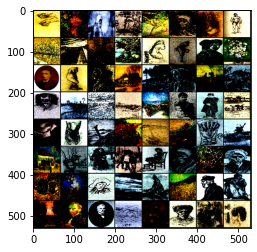

In [14]:
train_transform = transforms.Compose([transforms.ToTensor(), 
                                      transforms.Resize((64, 64)),
                                      transforms.Normalize(mean.tolist(), std.tolist())])

train_dataset = ArtDataset(transform=train_transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
print(f'length of dataset: {len(train_dataset)}')

# creating test loader to see what is truly loaded into our model
train_loader_test = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=2)
loaded_images_test=next(iter(train_loader_test))[0]
loaded_images_array = np.transpose(vutils.make_grid(loaded_images_test, padding=2, normalize=False).cpu().detach().numpy(),(1,2,0))
plt.imshow(loaded_images_array)

In [39]:
# Generator Model Class Definition with dropouts
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Block 1:input is Z, going into a convolution
            nn.ConvTranspose2d(100, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 2: input is (64 * 8) x 4 x 4
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 3: input is (64 * 4) x 8 x 8
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 4: input is (64 * 2) x 16 x 16
            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 5: input is (64) x 32 x 32
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
            # Output: output is (3) x 64 x 64
        )

    def forward(self, input):
        output = self.main(input)
        return output

# Discriminator Model Class Definition
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Block 1: input is (3) x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 2: input is (64) x 32 x 32
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 3: input is (64*2) x 16 x 16
            nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 4: input is (64*4) x 8 x 8
            nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.5,inplace=True),
            # Block 5: input is (64*8) x 4 x 4
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),
            nn.Flatten()
            # Output: 1
        )

    def forward(self, input):
        output = self.main(input)
        output  = output.reshape(output.shape[0])
        return output

    # custom weights initialization called on gen and disc model
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)

In [40]:
# set the device we will be using
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True #let cudnn choose most efficient way of calculating convulsions

generator = Generator().to(device)
generator.apply(weights_init)
discriminator = Discriminator().to(device)
discriminator.apply(weights_init)
adversarial_loss = nn.BCELoss()

def generator_loss(fake_output, label):
    gen_loss = adversarial_loss(fake_output, label)
    return gen_loss

def discriminator_loss(output, label):
    disc_loss = adversarial_loss(output, label)
    return disc_loss


G_optimizer = optim.Adam(generator.parameters(), lr = learning_rate, betas=betas)
D_optimizer = optim.SGD(discriminator.parameters(), lr = learning_rate, momentum=momentum)

# I decided to use external plotting service Weights and biases. It provides easy live preview of model state and  allows convenient run comparasion
!pip install wandb
!wandb login 33cccacf373072ab6a5edc82d4770dddf40d42fb
import wandb
#Connenting to wandb project to log data there
wandb.init(project="DCGAN_ART_1")
#wandb.watch(generator, discriminator, criterion, log="all", log_freq=400)


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [41]:
def save_model(time, PATHD, PATHG):
    torch.save(discriminator.state_dict(), PATHD)
    torch.save(generator.state_dict(), PATHG)

In [42]:
def test(epoch):
    with torch.no_grad():
        generator.eval()
        noise_vector = torch.randn(16, 100, 1, 1, device=device)
        noise_vector = noise_vector.to(device)
        generated_image = generator(noise_vector)
        generated_img_array = np.transpose(vutils.make_grid(generated_image, padding=2, normalize=True).cpu().detach().numpy(),(1,2,0))
        #print(generated_img_array.shape)
        images = wandb.Image(generated_img_array, caption=f"Top: epoch {epoch}, Bottom: X")
        wandb.log({"examples": images})
    generator.train()

In [43]:
test(0)

In [44]:
# datetime object containing current date and time
from datetime import datetime
now = datetime.now()
print("now =", now)
time = now.strftime("%d_%m_%Y__%H_%M_%S")
PATHD = f'/notebooks/ML_logs/DGAN_D_{time}.pt'
PATHG = f'/notebooks/ML_logs/DGAN_G_{time}.pt'
torch.autograd.set_detect_anomaly(True)


G_loss_best = 0
D_total_loss_best = 0
generator.train()
discriminator.train()
num_epochs = 300
for epoch in tqdm(range(1, num_epochs+1)):
    D_loss_list, G_loss_list = [], []
    for index, (real_images, _) in enumerate(train_loader):
        D_optimizer.zero_grad()
        real_images = real_images.to(device)
        real_target = torch.ones(real_images.size(0), requires_grad=True).to(device)
        fake_target = torch.zeros(real_images.size(0), requires_grad=True).to(device)
        output = discriminator(real_images)
        D_real_loss = discriminator_loss(output, real_target)
        D_real_loss.backward()

        noise_vector = torch.randn(real_images.size(0), 100, 1, 1, device=device)
        noise_vector = noise_vector.to(device)
        generated_image = generator(noise_vector)
        output = discriminator(generated_image.detach())
        D_fake_loss = discriminator_loss(output,fake_target)

        # train with fake
        D_fake_loss.backward()

        D_total_loss = D_real_loss + D_fake_loss
        #D_loss_list.append(D_total_loss)

        D_optimizer.step()

        # Train G on D's output
        G_optimizer.zero_grad()
        gen_output = discriminator(generated_image)
        G_loss = generator_loss(gen_output, real_target)
        #G_loss_list.append(G_loss)

        G_loss.backward()
        G_optimizer.step()
        
        
    #print(D_total_loss.tolist(), G_loss.tolist())
    
    #
    G_loss_d = G_loss.detach()
    D_real_loss_d = D_real_loss.detach()
    D_fake_loss_d = D_fake_loss.detach()
    D_total_loss_d = D_total_loss.detach()
    
    # log train_acc and test_acc to wandb
    wandb.log({"G_loss": G_loss_d})
    wandb.log({"D_real_loss": D_real_loss_d})
    wandb.log({'D_fake_loss': D_fake_loss_d})
    wandb.log({'D_total_loss':D_total_loss_d})
    
    if epoch % 2 == 0: #generate test batch every 3 epochs
        test(epoch)
    '''    
    if G_loss_d < G_loss_best or D_total_loss_d> D_total_loss_best:
        save_model(time, PATHD, PATHG)
        G_loss_best = G_loss_d 
        D_total_loss_best = D_total_loss_d
    '''
    
discriminator.load_state_dict(torch.load(PATHD))
generator.load_state_dict(torch.load(PATHG))

now = 2022-10-18 13:10:31.259300


  0%|          | 0/300 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/autograd/__init__.py:173: UserWarning: Error detected in LeakyReluBackward1. Traceback of forward call that caused the error:
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.9/dist-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/usr/local/lib/python3.9/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.9/dist-packages/tornado/platform/asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
    self._r

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.cuda.FloatTensor [1024, 512, 4, 4]], which is output 0 of LeakyReluBackward1, is at version 2; expected version 1 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

In [ ]:
#figure(figsize=(16, 16), dpi=100)
generated_img_array = np.transpose(vutils.make_grid(generated_image, padding=2, normalize=True).cpu(),(1,2,0))
images = wandb.Image(generated_img_array, caption="Top: epoch X, Bottom: X")
wandb.log({"examples": images}
#plt.imshow(generated_img_array)
#plt.savefig('/notebooks/ML_logs/fig.png')